In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping

with open("C:/Users/jyoth/OneDrive/Desktop/NextWordPredictionProjectML/data/pride_and_prejudice.txt.txt", 'r', encoding='utf-8') as file:
    text_data = file.read()

print(text_data[:500])


The Project Gutenberg eBook of Pride and Prejudice
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.




In [2]:
print(f"Dataset Length: {len(text_data)} characters")

Dataset Length: 748125 characters


In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text_data])
word_counts = tokenizer.word_counts

word_count_df = pd.DataFrame(word_counts.items(), columns=["Word", "Frequency"])
word_count_df = word_count_df.sort_values(by="Frequency", ascending=False)

print(word_count_df.head(10))


    Word  Frequency
0    the       4818
49    to       4385
4     of       3959
6    and       3744
323  her       2282
108    a       2081
14    in       2040
83   was       1874
129    i       1817
149    ”       1762


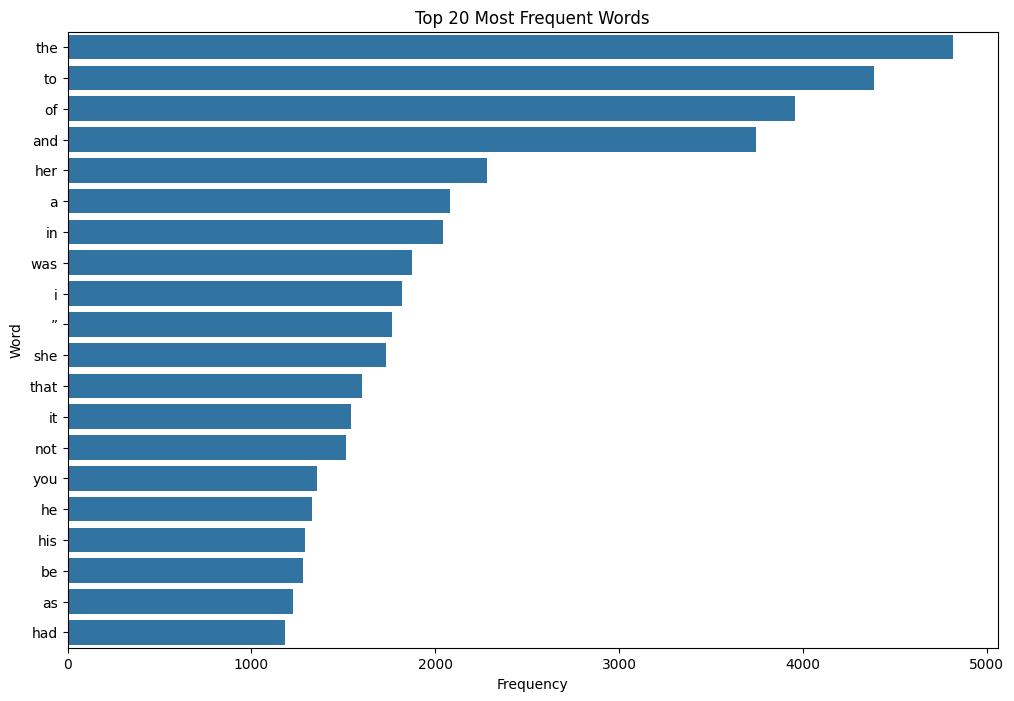

In [4]:
plt.figure(figsize=(12, 8))
sns.barplot(x="Frequency", y="Word", data=word_count_df.head(20))
plt.title('Top 20 Most Frequent Words')
plt.show()

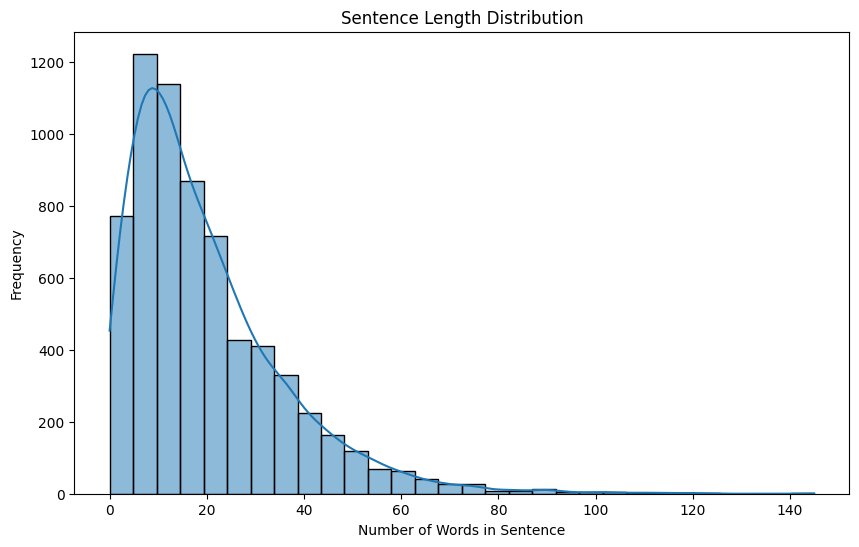

In [5]:
sentences = text_data.split('.')
sentence_lengths = [len(sentence.split()) for sentence in sentences]

plt.figure(figsize=(10, 6))
sns.histplot(sentence_lengths, bins=30, kde=True)
plt.title('Sentence Length Distribution')
plt.xlabel('Number of Words in Sentence')
plt.ylabel('Frequency')
plt.show()


In [6]:
sequences = tokenizer.texts_to_sequences([text_data])[0]
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for i in range(1, len(sequences)):
    input_sequences.append(sequences[i-1:i+1])

input_sequences = np.array(input_sequences)
X = input_sequences[:, 0]
Y = input_sequences[:, 1]

In [7]:
X = np.reshape(X, (X.shape[0], 1))  
Y = np.reshape(Y, (Y.shape[0], 1)) 


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
class_weights = compute_class_weight('balanced', classes=np.unique(Y_train), y=Y_train.ravel())
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

Class Weights: {0: 0.0040284086013564245, 1: 0.004396399256175836, 2: 0.004935765810288143, 3: 0.0051634181103615935, 4: 0.008368877023944685, 5: 0.009163076504271582, 6: 0.009408615704142441, 7: 0.010210804353074612, 8: 0.010632448029044658, 9: 0.01100352349444579, 10: 0.011342839196917686, 11: 0.011892953800001453, 12: 0.012428758637330561, 13: 0.012398833857304887, 14: 0.014397900266730558, 15: 0.014371113475536641, 16: 0.014940954532110143, 17: 0.014940954532110143, 18: 0.015828839125206853, 19: 0.016505285241668683, 20: 0.01688409506688731, 21: 0.01755562157522942, 22: 0.02001158936036514, 23: 0.020653672441446374, 24: 0.022553207279126845, 25: 0.02358617860488838, 26: 0.024561123984422714, 27: 0.02512023900195429, 28: 0.026140350230460047, 29: 0.02668211914715352, 30: 0.028715514844241428, 31: 0.029426565688003597, 32: 0.03178795676173228, 33: 0.03198539748696043, 34: 0.03225249892735259, 35: 0.03402851759075306, 36: 0.03351181558829043, 37: 0.03618020371475852, 38: 0.03601153143

In [10]:

model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(total_words, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, Y_test),
    class_weight=class_weights,
    callbacks=[early_stopping]
)


Epoch 1/10
1662/1662 ━━━━━━━━━━━━━━━━━━━━ 95s 51ms/step - accuracy: 0.0182 - loss: 8.7839 - val_accuracy: 0.0049 - val_loss: 8.2196
Epoch 2/10
1662/1662 ━━━━━━━━━━━━━━━━━━━━ 105s 63ms/step - accuracy: 0.0023 - loss: 8.5480 - val_accuracy: 0.0078 - val_loss: 8.0368
Epoch 3/10
1662/1662 ━━━━━━━━━━━━━━━━━━━━ 126s 54ms/step - accuracy: 0.0052 - loss: 7.9186 - val_accuracy: 0.0182 - val_loss: 7.9147
Epoch 4/10
1662/1662 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.0148 - loss: 7.3862 - val_accuracy: 0.0130 - val_loss: 7.9057
Epoch 5/10
1662/1662 ━━━━━━━━━━━━━━━━━━━━ 86s 52ms/step - accuracy: 0.0186 - loss: 6.9074 - val_accuracy: 0.0173 - val_loss: 7.8268
Epoch 6/10
1662/1662 ━━━━━━━━━━━━━━━━━━━━ 86s 51ms/step - accuracy: 0.0227 - loss: 6.3766 - val_accuracy: 0.0194 - val_loss: 7.8560
Epoch 7/10
1662/1662 ━━━━━━━━━━━━━━━━━━━━ 88s 53ms/step - accuracy: 0.0266 - loss: 6.0555 - val_accuracy: 0.0202 - val_loss: 7.8542
Epoch 8/10
1662/1662 ━━━━━━━━━━━━━━━━━━━━ 136s 49ms/step - accuracy: 0.028

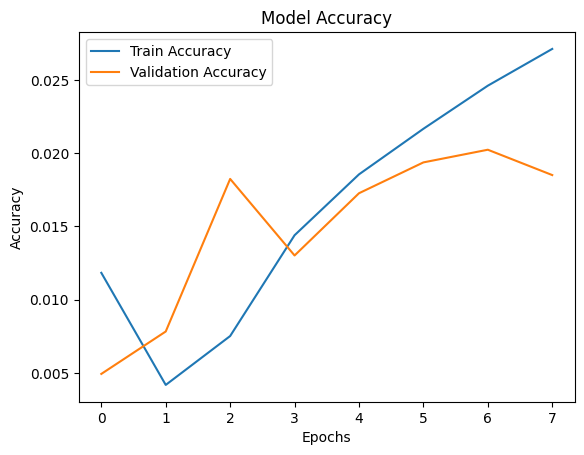

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
Y_pred_probs = model.predict(X_test)
Y_pred = np.argmax(Y_pred_probs, axis=1)

Y_test = Y_test.ravel()

unique_classes = np.unique(Y_test)
target_names = [tokenizer.index_word.get(i, f"Class {i}") for i in unique_classes]

print(classification_report(Y_test, Y_pred, labels=unique_classes, target_names=target_names, zero_division=1))

831/831 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step
                   precision    recall  f1-score   support

              the       1.00      0.00      0.00       982
               to       0.19      0.03      0.05       871
               of       0.23      0.24      0.23       829
              and       0.08      0.02      0.03       752
              her       1.00      0.00      0.00       436
                a       1.00      0.00      0.00       395
               in       1.00      0.00      0.00       398
              was       1.00      0.00      0.00       361
                i       1.00      0.00      0.00       364
                ”       1.00      0.00      0.00       358
              she       1.00      0.00      0.00       367
             that       0.00      0.00      0.00       303
               it       1.00      0.00      0.00       297
              not       0.60      0.01      0.02       270
              you       1.00      0.00      0.00       282
              

In [50]:
def predict_next_word(model, tokenizer, text, seq_length=1):
    tokenized_text = tokenizer.texts_to_sequences([text])[0]
    tokenized_text = pad_sequences([tokenized_text], maxlen=seq_length, padding='pre')
    predicted = model.predict(tokenized_text, verbose=0)
    predicted_word_index = np.argmax(predicted)
    return tokenizer.index_word[predicted_word_index]

user_input = input("Enter a word or sentence to predict the next word: ")

predicted_word = predict_next_word(model, tokenizer, user_input)

print(f"The predicted next word for '{user_input}' is: {predicted_word}")


Enter a word or sentence to predict the next word:  rate


The predicted next word for 'rate' is: situated
